<a href="https://colab.research.google.com/github/jtting22/ca05/blob/main/JTING_CA05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
#Import necessary packages

import pandas as pd
import numpy as np
import sklearn
from sklearn import linear_model
import sklearn.metrics as metrics
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import random
import seaborn as sns
from scipy.stats import uniform
import matplotlib.pyplot as plt

In [4]:
#Aquire the dataset
df = pd.read_csv('https://github.com/ArinB/CA05-B-Logistic-Regression/raw/master/cvd_data.csv')

In [5]:
#Showcase what the dataframe looks like using the head function
df.head(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [6]:
#To ensure the end of the data is the same as the top we can use the tail funciton
df.tail(5)

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


In [7]:
#Checking the shape of the data
df.shape

(3242, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [9]:
#Checking for null values
df.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

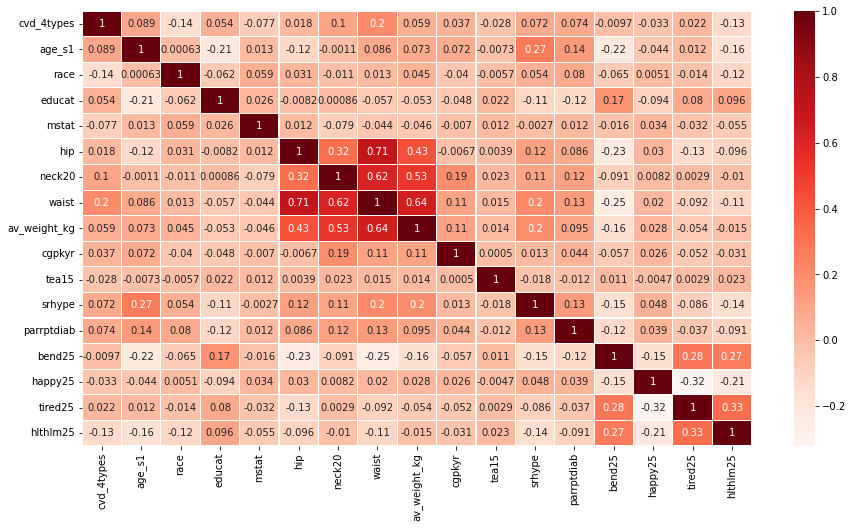

In [10]:
#Checking for multicollinearity.  Based off of the high collinearity between hip and waste I decided to remove both.
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, cmap='Reds')

df = df.drop(['hip','waist'], axis=1)

# **Part 1: Build a binary classifier model to predict the CVD Risk using a Logistic Regression Model with the best performance possible**

In [11]:
#Choose our independent and dependent variables for ths dataset
X = df.drop(['cvd_4types'],axis=1)
y = df.cvd_4types

In [12]:
#Split our data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [13]:
#Settting up our model as a logistic regression
lgr = linear_model.LogisticRegression(C = 1e40, solver = 'newton-cg')
fitted_model = lgr.fit(X_train, y_train)


In [14]:
#Predict our accuracy score
y_pred = lgr.predict(X_test)
accuracy = accuracy_score(y_test.values.flatten(),y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6392600205549845


**Model 2: Adding penalty**

In [15]:
#Add penalties to punish having too many variables
lgr1=linear_model.LogisticRegression(solver = 'newton-cg', random_state = 100, penalty = 'l2') 
fitmodel1 = lgr1.fit(X_train,y_train)

In [16]:
#predict our accuracy score with added penalties
y_pred = lgr1.predict(X_test)
accuracy1 = fitmodel1.score(X_test, y_test)
print("Accuracy:", accuracy1)

Accuracy: 0.6382322713257965


**Model 3: Adjusting C Values**

In [17]:
# Create the logistic model
logm = linear_model.LogisticRegression()

# Define penalties used for logistic regression model
penalty = ['l1', 'l2']

# Determine C values
c = uniform(loc = 0, scale = 4)

# Determine hyperparameters
hyperparameter = dict(C = c, penalty = penalty)

In [18]:
#Utilizing a randomized search with the randomizedsearch package.
logm2 = RandomizedSearchCV(logm, hyperparameter, random_state=100, n_iter=200, cv=5, verbose=0, n_jobs=-1)

In [19]:
optimum = logm2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
525 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
525 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: So

In [21]:
#Showcase the hyperparmeters and the c level that is most optimum
print("Optimum Hyperparameter:", optimum.best_estimator_.get_params()["penalty"])
print("Optimum C:", optimum.best_estimator_.get_params()["C"])

Optimum Hyperparameter: l2
Optimum C: 3.20196482227661


In [24]:
# Generate accuracy score
acc2 = optimum.score(X_test, y_test)
y_pred = optimum.predict(X_test)
print("Optimum Accuracy:", acc2)

Optimum Accuracy: 0.632065775950668


**Part 2: Display the Feature of all the Features in Decreasing Influence**

In [26]:
#Using our hyperparameter and 
model = linear_model.LogisticRegression(random_state=200, penalty='l2', C = 3.2019648222766, solver='newton-cg')
model.fit(X_train/np.std(X_train, 0), y_train)

# Sort by Feature Importance 
importance = (np.std(X_train, 0)*model.coef_[0])
importance.sort_values(ascending = False)

age_s1          1.144260
neck20          0.616255
cgpkyr          0.558183
av_weight_kg    0.388958
tired25         0.168772
educat          0.113219
parrptdiab      0.044060
srhype          0.032670
bend25          0.004154
tea15          -0.029044
happy25        -0.081002
race           -0.131983
mstat          -0.132999
hlthlm25       -0.257902
dtype: float64

**Part 3: Evaluate Performance of Model and ROC Curve**

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.32      0.42       412
           1       0.63      0.86      0.73       561

    accuracy                           0.63       973
   macro avg       0.63      0.59      0.58       973
weighted avg       0.63      0.63      0.60       973



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, 'ROC Curve')

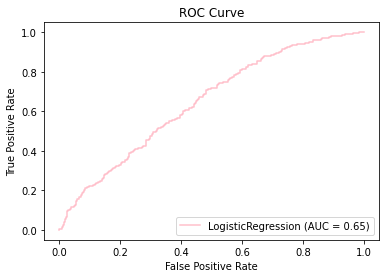

In [36]:
plot_roc_curve(lgr, X_test, y_test, color = "pink")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")